Based on a historical sample of height and age data, can you train the machine (computer) to predict the height given the age?

How can we make the machine learn this? ---- ALGORITHM

Let us begin with drawing a line on a two dimensional space

In [ ]:
# SAMPLE DATA

age = [1,2,3,4,5]
height =[100, 105,110,115,120]

Now plot these data points

Text(0, 0.5, 'height')

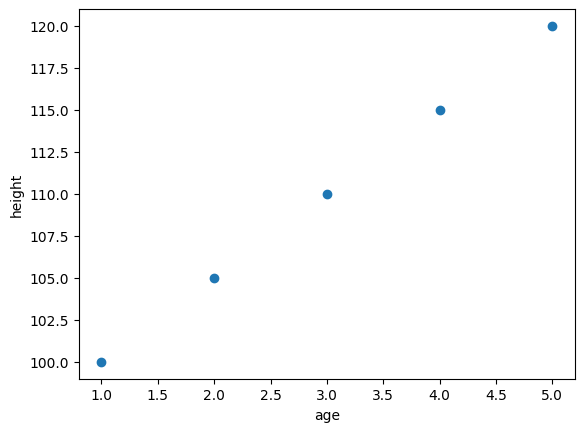

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(age, height)
plt.xlabel('age')
plt.ylabel('height')

For every 1 year increase in AGE, height is increased by 5cm. CHANGE in HEIGHT with respect to AGE.


How can we find it mathematically? Because, machine can only understand numbers.

`d(HEIGHT)/d(AGE) ~= dy/dx`

Let us take two points to begin with


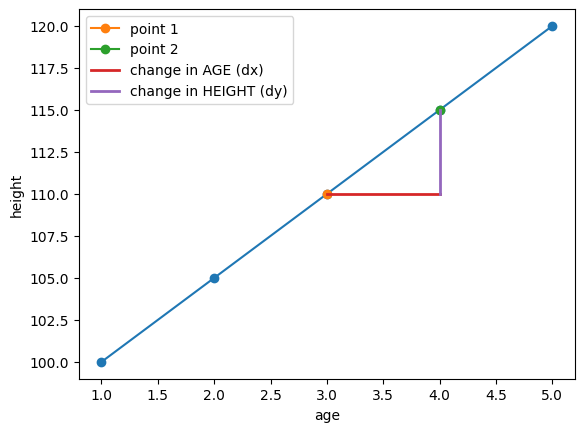

In [ ]:
x = age
y = height
plt.plot(age,height)
plt.scatter(age, height)
plt.plot(x[2],y[2],label = 'point 1',marker = 'o')
plt.plot(x[3],y[3],label = 'point 2',marker = 'o')

plt.plot([x[2],x[3]],[y[2],y[2]],linewidth = 2,label = 'change in AGE (dx)')
plt.plot([x[3],x[3]],[y[2],y[3]],linewidth = 2,label = 'change in HEIGHT (dy)')
plt.xlabel('age')
plt.ylabel('height')
plt.legend()

In the above example, you can think of moving from point 1 to point 2. Change in x is 1 year leading to 5cm increase in y (i.e. height)

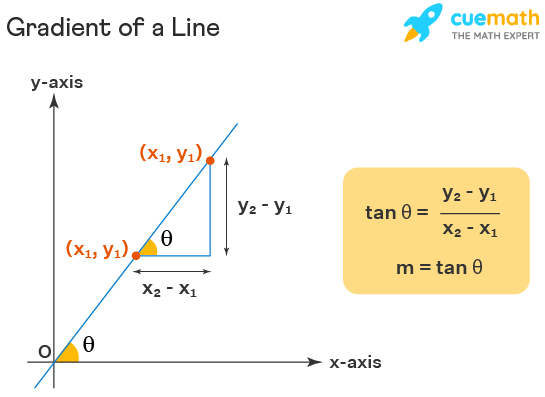

Point 1: (3, 110)

Point 2: (4, 115)

Change in AGE (dx) = 1

Change in HEIGHT (dy) = 5

dy/dx (change in y given x) = 5/1 = 5.... We call this the slope(m) or gradient - Measures the direction and magnitude of change.

So, for every 1 unit (year) increase in age, height is increased to 5 unit (cm) increasing in the rate of 5.

For a single-variable function, gradient = derivative, and tan θ = derivative of the function at that point. Thus, the gradient is the same as the slope of the tangent line.

The relationship between AGE and HEIGHT when you want to learn height given the age is:

HEIGHT = m * AGE

In [ ]:
delta_y = np.abs(y[2] - y[3])
delta_x = np.abs(x[2] - x[3])

print('Change in AGE:', delta_x)
print('Change in HEIGHT:', delta_y)

print('Slope (in cm per year):', delta_y/delta_x)
import math
theta = math.atan2(delta_y, delta_x)
angle = math.degrees(theta)
if angle < 0:
  angle = 360 + angle

print('Slope (in radians):', theta)
print('Slope (in angle):', angle)

Change in AGE: 1
Change in HEIGHT: 5
Slope (in cm per year): 5.0
Slope (in radians): 1.373400766945016
Slope (in angle): 78.69006752597979


In [ ]:
slope = 5
new_age = 6
new_height = slope * new_age
print(new_height)

30


In [ ]:
y_intercept = 95 # possible value for y when x is 0
new_height = y_intercept + (slope * new_age)
print(new_height)

125


Therefore, the linear equation is given as:

y = y_intercept + m*x

And for this data:

y = 95 + 5x

Now the objective is to use `x` and `y` to learn the values for `m` and `b`.. HOW? - Optimization!!!!

******************************************************************************************************************************************************************************************************************************************************************************

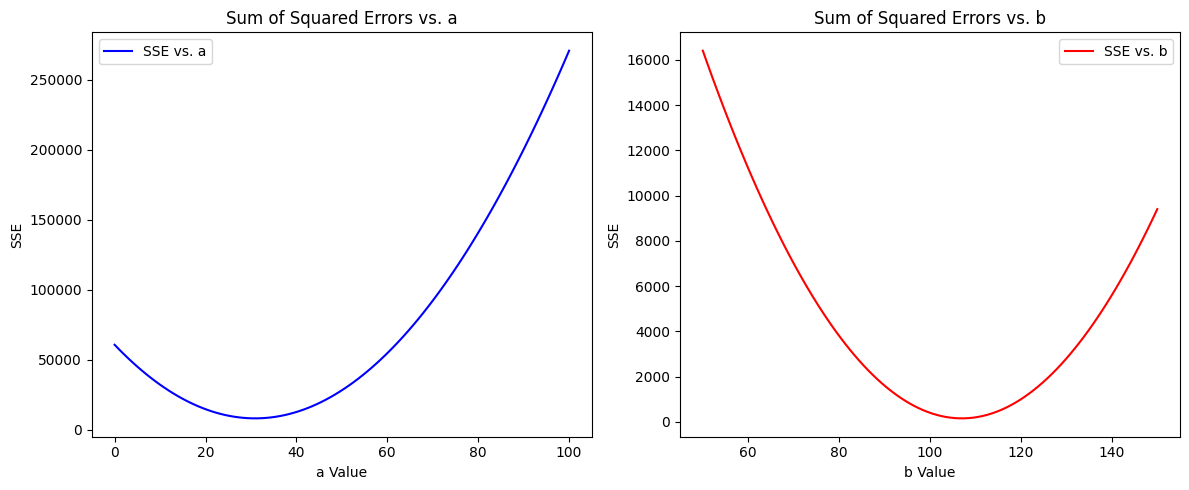

In [ ]:
# REF: https://machinelearningmastery.com/calculus-in-machine-learning-why-it-works/
import numpy as np
import matplotlib.pyplot as plt

# Sample data
age = np.array([1, 2, 3, 4, 5])
height = np.array([100, 105, 110, 115, 120])

# Define range of a and b values
a_values = np.linspace(0, 100, 100)  # Exploring a reasonable range for a
b_values = np.linspace(50, 150, 100)  # Exploring a reasonable range for b

# Compute SSE for varying a (fixing b = 0)
sse_a = [np.sum((a * age - height) ** 2) for a in a_values] # ax+b - y is the error; here b = 0

# Compute SSE for varying b (fixing a = 1)
sse_b = [np.sum((1 * age + b - height) ** 2) for b in b_values] #ax+b -y is the error; here a = 1

# Plot SSE vs. a
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(a_values, sse_a, label="SSE vs. a", color="blue")
plt.xlabel("a Value")
plt.ylabel("SSE")
plt.title("Sum of Squared Errors vs. a")
plt.legend()

# Plot SSE vs. b
plt.subplot(1, 2, 2)
plt.plot(b_values, sse_b, label="SSE vs. b", color="red")
plt.xlabel("b Value")
plt.ylabel("SSE")
plt.title("Sum of Squared Errors vs. b")
plt.legend()

plt.tight_layout()
plt.show()

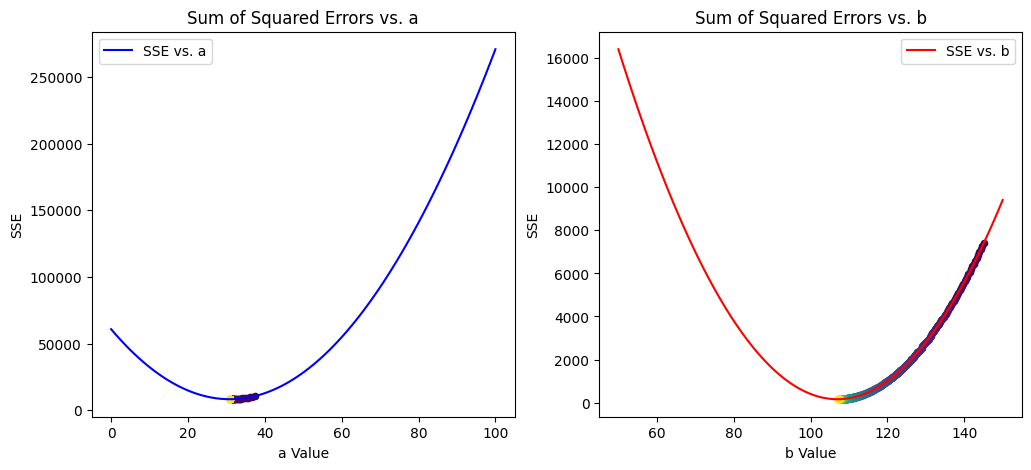

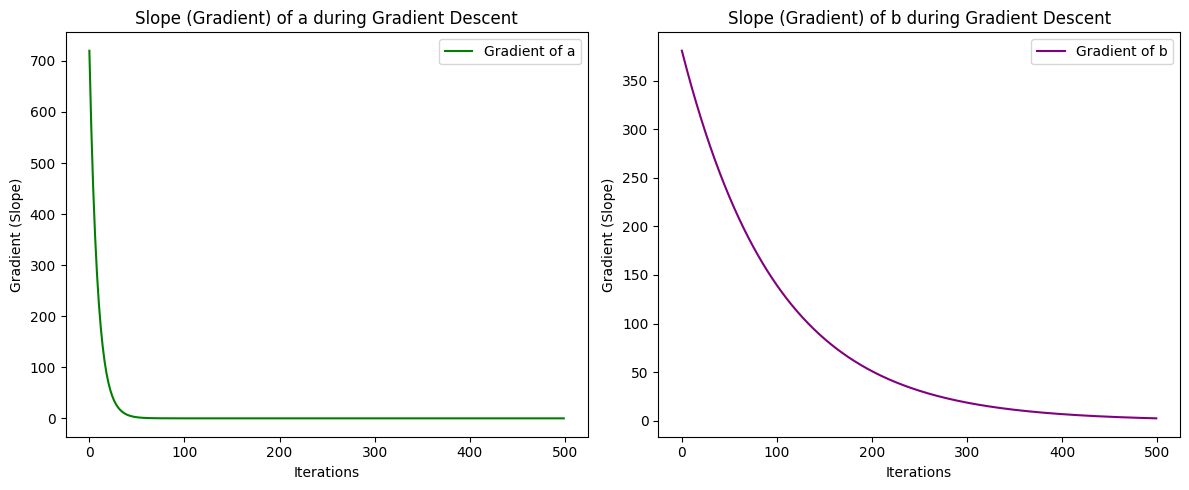

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# Sample data
age = np.array([1, 2, 3, 4, 5])
height = np.array([100, 105, 110, 115, 120])

# Define range of a and b values
a_values = np.linspace(0, 100, 100)  # Exploring a reasonable range for a
b_values = np.linspace(50, 150, 100)  # Exploring a reasonable range for b

# Compute SSE for varying a (fixing b = 0)
sse_a = [np.sum((a * age - height) ** 2) for a in a_values] # ax+b - y is the error; here b = 0

# Compute SSE for varying b (fixing a = 1)
sse_b = [np.sum((1 * age + b - height) ** 2) for b in b_values] #ax+b -y is the error; here a = 1

# Gradient Descent Initialization for a
np.random.seed(42)
a_current = np.random.uniform(0, 100)
learning_rate_a = 0.001
iterations = 500
a_path, sse_a_path, grad_a_path = [a_current], [np.sum((a_current * age - height) ** 2)], []

for _ in range(iterations):
    grad_a = 2 * np.sum((a_current * age - height) * age)  # Gradient with respect to a
    a_current -= learning_rate_a * grad_a  # Update a
    a_path.append(a_current)
    sse_a_path.append(np.sum((a_current * age - height) ** 2))  # Compute new SSE
    grad_a_path.append(grad_a)  # Store gradient value

# Gradient Descent Initialization for b
b_current = np.random.uniform(50, 150)
learning_rate_b = 0.001
b_path, sse_b_path, grad_b_path = [b_current], [np.sum((1 * age + b_current - height) ** 2)], []

for _ in range(iterations):
    grad_b = 2 * np.sum((1 * age + b_current - height))  # Gradient with respect to b
    b_current -= learning_rate_b * grad_b  # Update b
    b_path.append(b_current)
    sse_b_path.append(np.sum((1 * age + b_current - height) ** 2))  # Compute new SSE
    grad_b_path.append(grad_b)  # Store gradient value

# Create gradient colors
colors = cm.viridis(np.linspace(0, 1, iterations + 1))

# Plot SSE vs. a with Gradient Descent Path and slope values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(a_values, sse_a, label="SSE vs. a", color="blue")
for i in range(iterations):
    plt.scatter(a_path[i], sse_a_path[i], color=colors[i], s=20)
plt.xlabel("a Value")
plt.ylabel("SSE")
plt.title("Sum of Squared Errors vs. a")
plt.legend()

# Plot SSE vs. b with Gradient Descent Path and slope values
plt.subplot(1, 2, 2)
plt.plot(b_values, sse_b, label="SSE vs. b", color="red")
for i in range(iterations):
    plt.scatter(b_path[i], sse_b_path[i], color=colors[i], s=20)
plt.xlabel("b Value")
plt.ylabel("SSE")
plt.title("Sum of Squared Errors vs. b")
plt.legend()

# Show slope values
plt.figure(figsize=(12, 5))

# Plot slope of a (gradients) over iterations
plt.subplot(1, 2, 1)
plt.plot(grad_a_path, label="Gradient of a", color="green")
plt.xlabel("Iterations")
plt.ylabel("Gradient (Slope)")
plt.title("Slope (Gradient) of a during Gradient Descent")
plt.legend()

# Plot slope of b (gradients) over iterations
plt.subplot(1, 2, 2)
plt.plot(grad_b_path, label="Gradient of b", color="purple")
plt.xlabel("Iterations")
plt.ylabel("Gradient (Slope)")
plt.title("Slope (Gradient) of b during Gradient Descent")
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.cm as cm

# Sample data
age = np.array([1, 2, 3, 4, 5])
height = np.array([100, 105, 110, 115, 120])

# Define range of a and b values
a_values = np.linspace(-100, 100, 100)
b_values = np.linspace(-50, 150, 100)
A, B = np.meshgrid(a_values, b_values)
SSE = np.array([[np.sum((a * age + b - height) ** 2) for a in a_values] for b in b_values])

# Gradient Descent Initialization
np.random.seed(42)
a_current = np.random.uniform(15, 30)
b_current = np.random.uniform(50, 150)
learning_rate = 0.01
iterations = 50
path_a, path_b, path_sse = [a_current], [b_current], [np.sum((a_current * age + b_current - height) ** 2)]

# Perform Gradient Descent
for _ in range(iterations):
    predictions = a_current * age + b_current
    error = predictions - height

    # Compute gradients
    grad_a = 2 * np.sum(error * age)
    grad_b = 2 * np.sum(error)

    # Update parameters
    a_current -= learning_rate * grad_a
    b_current -= learning_rate * grad_b

    # Store path
    path_a.append(a_current)
    path_b.append(b_current)
    path_sse.append(np.sum((a_current * age + b_current - height) ** 2))

# Find the minimum SSE point
min_idx = np.unravel_index(np.argmin(SSE), SSE.shape)
best_a, best_b, best_sse = a_values[min_idx[1]], b_values[min_idx[0]], SSE[min_idx]

# Create an interactive 3D surface plot
fig = go.Figure(data=[go.Surface(z=SSE, x=a_values, y=b_values, colorscale="viridis")])

# Highlight the best SSE point
fig.add_trace(go.Scatter3d(x=[best_a], y=[best_b], z=[best_sse],
                           mode='markers', marker=dict(size=6, color='red', symbol='diamond'),
                           name='Best SSE'))

# Create a colormap for the gradient descent path
colors = cm.viridis(np.linspace(0, 1, iterations + 1))
colors_hex = ["rgb({},{},{})".format(int(r * 255), int(g * 255), int(b * 255)) for r, g, b, _ in colors]

# Plot gradient descent path with color gradient
fig.add_trace(go.Scatter3d(x=path_a, y=path_b, z=path_sse,
                           mode='lines+markers',
                           marker=dict(size=4, color=colors_hex, opacity=0.8),
                           line=dict(color='yellow', width=2),
                           name='Gradient Descent Path'))
# Highlight the final parameters from gradient descent
fig.add_trace(go.Scatter3d(x=[path_a[-1]], y=[path_b[-1]], z=[path_sse[-1]],
                           mode='markers', marker=dict(size=6, color='green', symbol='x'),
                           name='Optimal Point (Gradient Descent Result)'))
# Update layout for better visualization
fig.update_layout(
    title="Interactive 3D Error Surface with Gradient Descent Path",
    width=1000,  # Increase width
    height=800,  # Increase height
    scene=dict(
        xaxis_title="a (Slope)",
        yaxis_title="b (Intercept)",
        zaxis_title="SSE"
    )
)

# Show interactive figure
fig.show()


In [ ]:
print('Best params:\n')
print('a:',best_a)
print('b', best_b)
print('SSE', best_sse)

Best params:

a: 5.050505050505052
b 95.45454545454547
SSE 1.8620548923580285


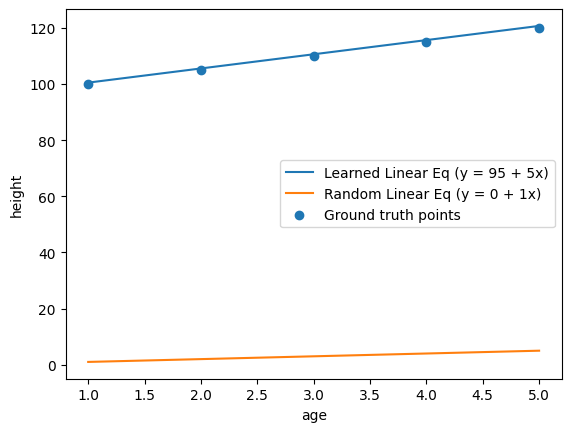

In [ ]:
y_predicted = best_b + (best_a * age)
y_predicted_radom_assumption = 0 + (1 * age)
plt.plot(x,y_predicted, label = 'Learned Linear Eq (y = 95 + 5x)')
plt.plot(x, y_predicted_radom_assumption, label = 'Random Linear Eq (y = 0 + 1x)')
plt.scatter(age,height, label = 'Ground truth points')
plt.xlabel('age')
plt.ylabel('height')
plt.legend()

Focus on Gradient Descent:

Rather than calculating the entire error surface, you can focus on the specific area around your current guess for a and b. Gradient descent will only update the parameters in the direction of the gradient and will eventually converge to the minimum.

You don't need the entire surface to run gradient descent. You only need the gradient at the current position of a and b, which is much less computationally expensive.

Imagine you're trying to minimize the SSE, but you don't know what the full surface looks like. You start at an initial point (random or chosen) and compute the gradient at that point. The gradient tells you how steep the surface is at that point, and in which direction to move to lower the error.

Let's say you're at the point
𝑎
=
5
and
𝑏
= 100.

You compute the gradients for
𝑎
and
𝑏
, which tell you in which direction you should move. After a few iterations, you'll find that you're getting closer to the minimum, but at no point do you need to calculate the error for every possible combination of
𝑎
and
𝑏. You just need to move iteratively based on local gradients.


Here, the variables you're optimizing are both
𝑎
and
𝑏. To minimize the SSE, you need to compute the gradient of the SSE with respect to each of the variables, which involves calculating the **partial derivatives** of the SSE with respect to
𝑎
and
𝑏
.

***Final Implementation without visualization***



In [ ]:
import numpy as np

# Define the cost function (mean squared error)
def cost_function(y_true, y_pred):
    return np.mean((y_true - y_pred)**2)

# Define the gradient descent function
def gradient_descent(X, y, learning_rate=0.01, epochs= 3000):
    # Initialize parameters
    m = 0  # Slope
    b = 1  # Intercept

    # Perform gradient descent
    for epoch in range(epochs):
        # Predicted values
        y_pred = m * X + b

        # Compute gradients
        gradient_m = -2 * np.mean(X * (y - y_pred))  # Partial derivative wrt m
        gradient_b = -2 * np.mean(y - y_pred)        # Partial derivative wrt b

        # Update parameters
        m -= learning_rate * gradient_m
        b -= learning_rate * gradient_b

        # Print progress
        if epoch % 100 == 0:
            loss = cost_function(y, y_pred)
            print(f'Epoch {epoch}: Loss = {loss:.4f}, m = {m:.4f}, b = {b:.4f}')

    return m, b

# Example data
x = np.array(age)
y = np.array(height)

# Perform gradient descent
m, b = gradient_descent(x, y)

# Print the final equation
print(f'Final equation: y = {m:.2f}x + {b:.2f}')


Epoch 0: Loss = 11931.0000, m = 6.7400, b = 3.1800
Epoch 100: Loss = 684.0797, m = 21.9231, b = 33.9021
Epoch 200: Loss = 347.4902, m = 17.0614, b = 51.4544
Epoch 300: Loss = 176.5137, m = 13.5964, b = 63.9643
Epoch 400: Loss = 89.6632, m = 11.1268, b = 72.8803
Epoch 500: Loss = 45.5460, m = 9.3667, b = 79.2349
Epoch 600: Loss = 23.1359, m = 8.1122, b = 83.7639
Epoch 700: Loss = 11.7523, m = 7.2181, b = 86.9918
Epoch 800: Loss = 5.9698, m = 6.5809, b = 89.2924
Epoch 900: Loss = 3.0324, m = 6.1267, b = 90.9321
Epoch 1000: Loss = 1.5404, m = 5.8030, b = 92.1007
Epoch 1100: Loss = 0.7825, m = 5.5723, b = 92.9336
Epoch 1200: Loss = 0.3975, m = 5.4079, b = 93.5273
Epoch 1300: Loss = 0.2019, m = 5.2907, b = 93.9504
Epoch 1400: Loss = 0.1026, m = 5.2072, b = 94.2519
Epoch 1500: Loss = 0.0521, m = 5.1477, b = 94.4668
Epoch 1600: Loss = 0.0265, m = 5.1053, b = 94.6200
Epoch 1700: Loss = 0.0134, m = 5.0750, b = 94.7292
Epoch 1800: Loss = 0.0068, m = 5.0535, b = 94.8070
Epoch 1900: Loss = 0.0035,